<a href="https://colab.research.google.com/github/Yunho-seo/education_center5/blob/main/29_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
# 다중 퍼셉트론 (MLP) 이용하여 논리 게이트를 구현
import numpy as np
w11 = np.array([-2, -2])  # 가중치
w12 = np.array([2, 2])
w2 = np.array([1, 1])

b1 = 3  # 바이어스(bias) : 가중치가 0으로 되는 것을 방지하기 위해 layer마다 1개씩 존재한다.
b2 = -1
b3 = -1

def MLP(x, w, b):  # Multi layer perceptron / 입력벡터 x, 가중치 벡터 w, 편향값 b
  y = np.sum(w * x) + b  # x와 w의 내적에 b를 더함
  if y <= 0:  # 결과값이 0보다 작거나 같으면 0을 반환
    return 0  # False
  else:
    return 1  # True

def NAND(x1, x2):
  return MLP(np.array([x1, x2]), w11, b1)
def OR(x1, x2):
  return MLP(np.array([x1, x2]), w12, b2)
def AND(x1, x2):  # 두 변수가 True일때만 True
  return MLP(np.array([x1, x2]), w2, b3)  # np.array([1, 1]), b3 = -1
def XOR(x1, x2):  # XOR 게이트는 다른 논리 게이트들의 조합으로 구성됨
  return AND(NAND(x1, x2), OR(x1, x2))  # 중간에 layer가 필요하다.

In [76]:
# 가중치 값과 바이어스만 조정하면, 회로도를 출력할 수 있다.
print("OR 문제")
for x in [(0, 0), (1, 0), (0, 1), (1, 1)]:
  y = OR(x[0], x[1])
  print("입력값: " + str(x) + "출력값: " + str(y))
print("AND 문제")
for x in [(0, 0), (1, 0), (0, 1), (1, 1)]:
  y = AND(x[0], x[1])
  print("입력값: " + str(x) + "출력값: " + str(y))
print("NAND 문제")
for x in [(0, 0), (1, 0), (0, 1), (1, 1)]:
  y = NAND(x[0], x[1])
  print("입력값: " + str(x) + "출력값: " + str(y))
print("XOR 문제")
for x in [(0, 0), (1, 0), (0, 1), (1, 1)]:
  y = XOR(x[0], x[1])
  print("입력값: " + str(x) + "출력값: " + str(y))

OR 문제
입력값: (0, 0)출력값: 0
입력값: (1, 0)출력값: 1
입력값: (0, 1)출력값: 1
입력값: (1, 1)출력값: 1
AND 문제
입력값: (0, 0)출력값: 0
입력값: (1, 0)출력값: 0
입력값: (0, 1)출력값: 0
입력값: (1, 1)출력값: 1
NAND 문제
입력값: (0, 0)출력값: 1
입력값: (1, 0)출력값: 1
입력값: (0, 1)출력값: 1
입력값: (1, 1)출력값: 0
XOR 문제
입력값: (0, 0)출력값: 0
입력값: (1, 0)출력값: 1
입력값: (0, 1)출력값: 1
입력값: (1, 1)출력값: 0


In [ ]:
# 한글화
!apt-get update -qq
!apt-get install fonts-nanum* -qq
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname = r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size':18, 'font.family':'NanumGothic'})

In [78]:
# 데이터 X와 레이블 y를 시각화 
def plot_iris(X, y, model, title, xmin=-2.5, xmax=2.5, ymin=-2.5, ymax=2.5):  # X는 데이터의 특성, y는 데이터 레이블
  XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax - xmin) / 1000),  # XX, YY라는 격자 좌표, meshgrid()로 x, y 좌표 생성
                       np.arange(ymin, ymax, (ymax - ymin) / 1000))  # X 데이터와 Y 데이터의 조합
  ZZ = np.reshape(model.predict(np.array([XX.ravel(), YY.ravel()]).T), XX.shape)  # 각 좌표에 대한 예측값 계산 후 변환
  plt.contourf(XX, YY, ZZ, alpha = 0.5)  # 분류선을 출력 / 등고선 그래프
  plt.scatter(X[y == 0, 0], X[y == 0, 1], c = 'r', marker = 'o', label = '0', s = 100)  # y값이 0인 데이터는 빨간 원
  plt.scatter(X[y == 1, 0], X[y == 1, 1], c = 'g', marker = 's', label = '1', s = 100)  # X값이 1인 데이터는 초록 네모
  plt.xlim(xmin, xmax)
  plt.ylim(ymin, ymax)
  plt.title(title)
  plt.show()

In [79]:
# Linear Regression 선형
# 회귀에서 비선형을 다루려면, 데이터를 고차원으로 변환하여야 함
# 신경망에서는 매번 내적 계산시마다 activation function을 달아 비선형으로 매핑(mapping)한다.
# sigmoid(0 ~ 1 사이 값), tanh(-1 ~ 1 사이 값), relu(양수는 그대로, 음수는 0)

(100, 2)
(100,)


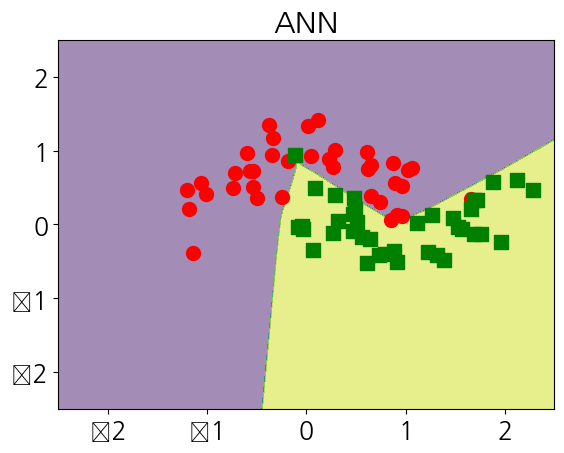

Text(0, 0.5, '특성 1')

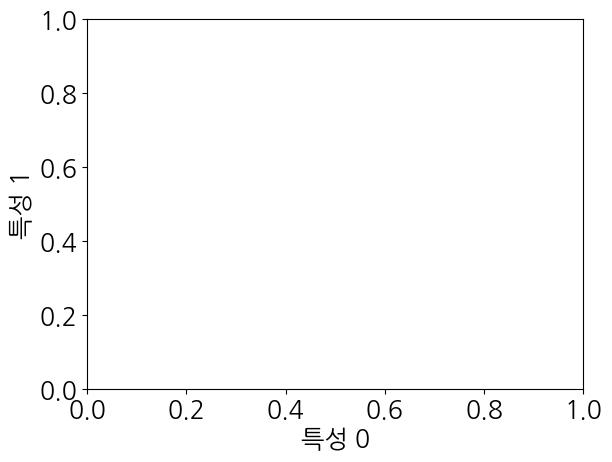

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples = 100, noise = 0.25, random_state = 3)
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,
                                                    random_state = 42)
mlp = MLPClassifier(max_iter = 3000, random_state = 0).fit(X_train, y_train)
# adam : learning-rate (학습률) + momentum (지그재그 이동을 방지 : 가던 방향을 고려) 지원 
# 처음에는 크게 오차가 작아지면, 점점 작게 조절한다. (작은 데이터로도 fitting이 가능)
# alpha : L2 regularization(규제) - 과적합을 방지
# batch_size 여러개의 sample 결과값을 한꺼번에 조절 : 지역해에 빠지는 것을 방지
# 평균으로 한번 오차를 조절하는 방법 : batch 학습법
# adaptive 적응적.
# momentum, nesterovs_momentum (진행 방향의 끝에서 주어진 방향으로 이동)
# early_stopping : 과적합 방지 오차가 늘어나면, 일정기간 참다가 종료한다.
plot_iris(X_train, y_train, mlp, "ANN")
plt.xlabel("특성 0")
plt.ylabel("특성 1")

In [ ]:
mlp.coefs_  # MLPClassifier 모델의 가중치 / 리스트 형태

In [82]:
mlp.get_params()  # MLPClassifier 모델의 default parameter / 매개변수명을 키(key)fh, 설정값을 값(value)으로 가짐

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 3000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 0,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

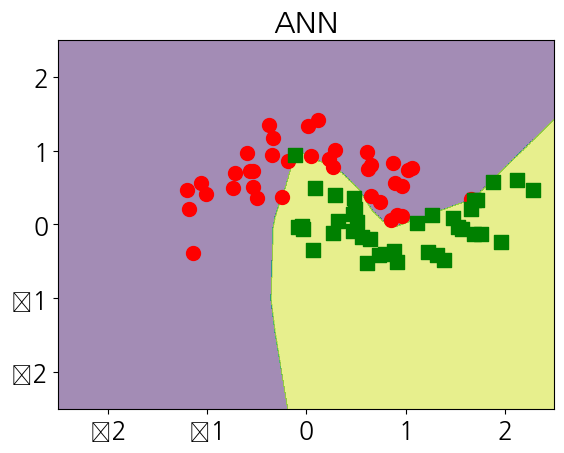

Text(0, 0.5, '특성 1')

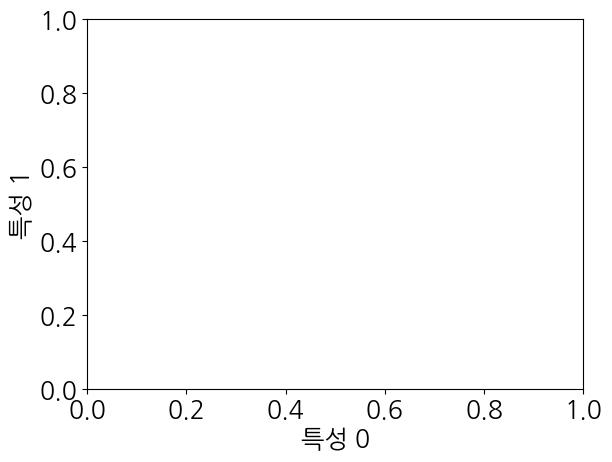

In [83]:
# MLPClassifier 모델을 사용하여 다층 퍼셉트론 학습과 결정 경계를 시각화
# slover : 최적화에 사용할 lbfgs 알고리즘
mlp = MLPClassifier(solver = 'lbfgs', random_state = 0, hidden_layer_sizes = [20, 20])  # 두개의 은닉층과 각각 20개의 유닛
mlp.fit(X_train, y_train)  # 모델을 훈련셋에 학습 (X_train은 훈련 데이터의 입력특성, y_train은 훈련 데이터의 클래스 레이블)
plot_iris(X_train, y_train, mlp, "ANN")  # 훈련셋 데이터와 MLP 분류기의 결정 경계를 시각화 (x, y축에 레이블 추가)
plt.xlabel("특성 0")  # x 축 레이블
plt.ylabel("특성 1")  # y 축 레이블

# hidden_layer_sizes = [30, 10]이라면,
# 75 x 2  2 x 30  30 x 10  10 x 10

In [84]:
X_train.shape

(75, 2)

In [85]:
# ndarray를 리스트(list)로 묶어 놓음
mlp.coefs_[0].shape  # (2, 20)
# 이진 분류문제
# (75, 2) (2, 20) => 75 x 20 (20, 20) => 75 x 20 (20 x 1) => binary인 경우 출력층으로 1개가 나간다.
#

(2, 20)

In [86]:
mlp.coefs_[1].shape  # (20, 20)

(20, 20)

In [87]:
mlp.coefs_[2].shape  # (20, 1)

(20, 1)

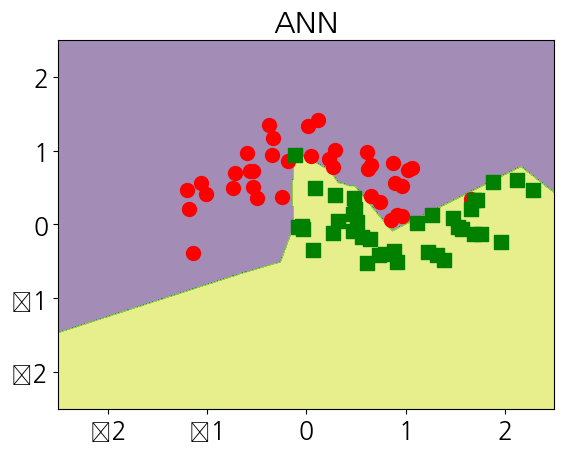

In [88]:
mlp = MLPClassifier(solver = 'lbfgs', max_iter = 500,  # max_iter() : 학습 epoch의 최대 횟수
                    random_state = 0, hidden_layer_sizes = [10, 10])  # 두개의 은닉층을 가지고, 각각 10개의 유닛을 가짐
mlp.fit(X_train, y_train)
plot_iris(X_train, y_train, mlp, "ANN")
# 가중치 사이즈 계산하기
# (75x2) (2x10) (10x10) (10x1)

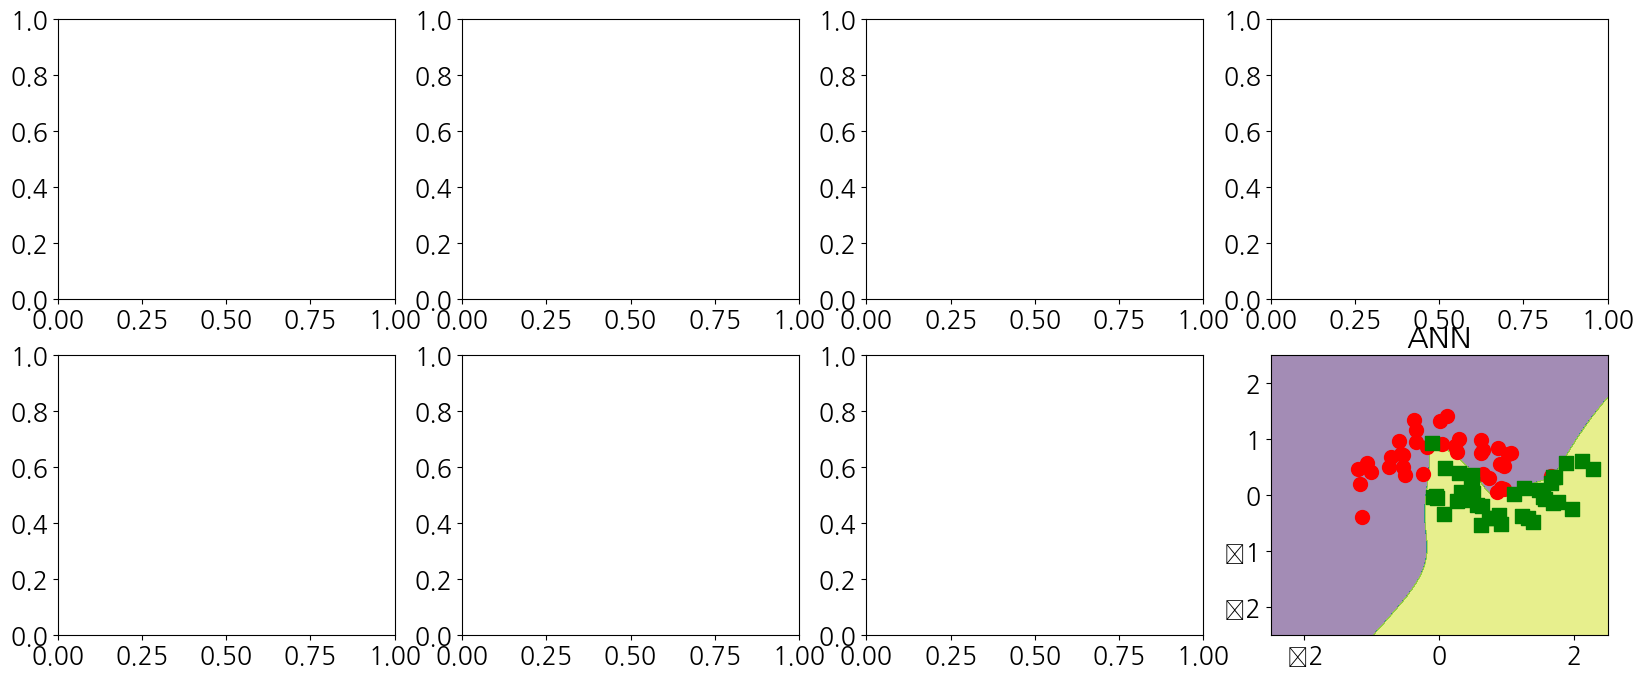

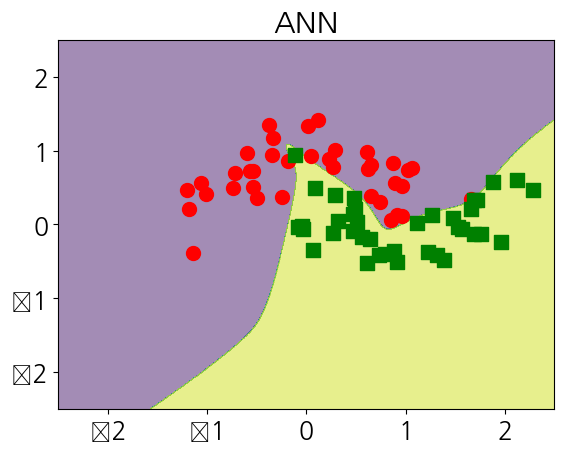

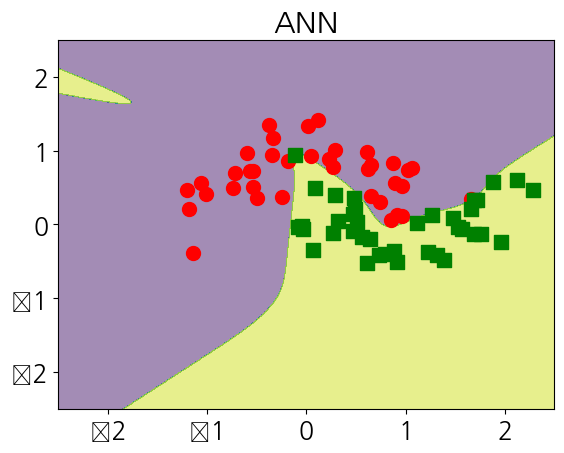

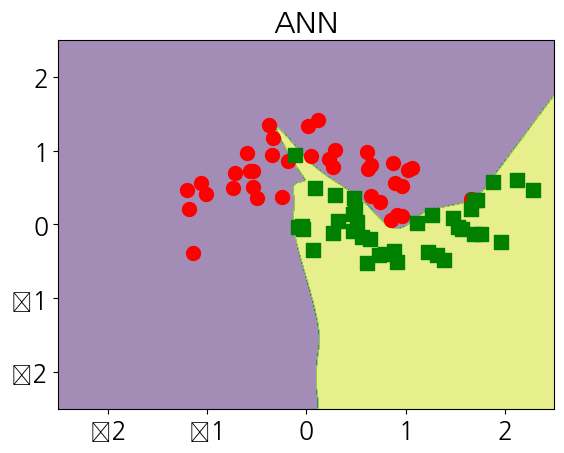

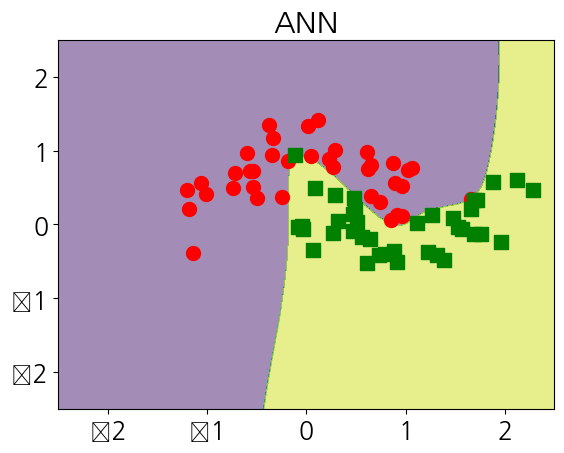

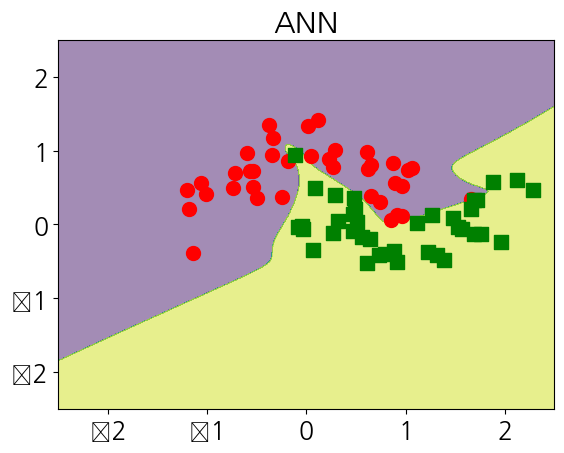

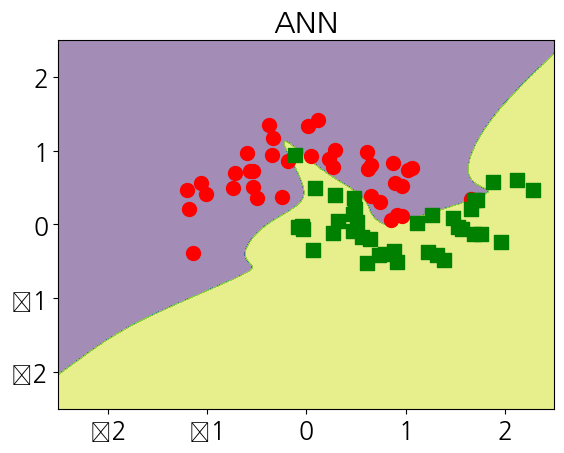

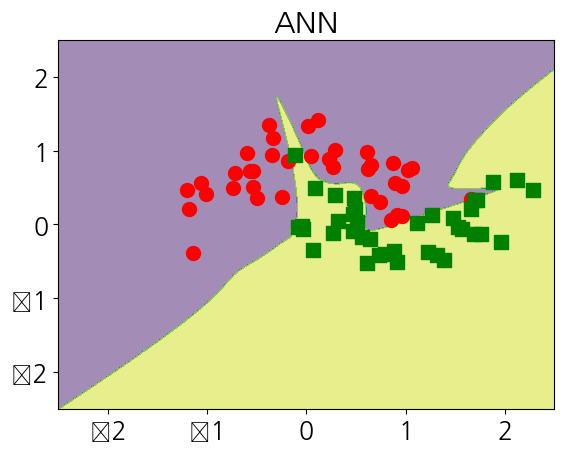

In [89]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
# 레이어의 사이즈를 변화시킬 때, 큰 사이즈는 과적합을 유발하게 된다.
# (75x2) (2x10) (10x10) (10x1)
# (75x2) (2x100) (100x100) (100x1)
# 특징을 추출하는 횟수가 증가(10번 -> 100번) -> 과적합
# 규제를 하는 이유? 과적합을 방지하기 위해. (규제의 사이즈 감소 => 규제를 하지 않음 => 과적합)
for axx, n_hidden_nodes in zip(axes, [10, 100]):  # axx를 통해 행(row) 단위로 서브플롯 순회
  for ax, alpha in zip(axx, [0.1, 0.01, 0.001, 0.0001]):  # 점점 규제가 작아짐 -> 과적합
    mlp = MLPClassifier(solver = 'lbfgs', random_state = 0, activation = 'tanh',  # tanh 활성화 함수
        max_iter = 1000, hidden_layer_sizes = [n_hidden_nodes, n_hidden_nodes],  # 두개의 은닉층, n_hidden_nodes개의 유닛
                         alpha = alpha)  # alpha : L2 정규화의 강도를 제어하는 값이다.
    mlp.fit(X_train, y_train)
    plot_iris(X_train, y_train, mlp, "ANN")

In [90]:
from sklearn.datasets import load_breast_cancer  # 유방암 데이터셋 
import pandas as pd
cancer = load_breast_cancer()  # 데이터셋을 load하고 해당 데이터셋의 특성 이름(feature name) 출력
cancer.feature_names  # 암이 악성인지 양성인지? / 30개의 특성

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [91]:
pd.DataFrame(cancer.data).shape  # 569개의 데이터, 30개의 변수

(569, 30)

In [92]:
# 정규화 여부와 신경망의 정확도 차이 
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state = 0)  # 유방암 데이터셋을 훈련 세트와 테스트 세트로 나눈다.

mlp = MLPClassifier(random_state = 42)  # random_state() : 난수 발생 시드 (42가 디폴트)
mlp.fit(X_train, y_train)  # 훈련세트에 대해 모델을 학습
print("훈련 세트 정확도: {:.2f}".format(mlp.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(mlp.score(X_test, y_test)))

훈련 세트 정확도: 0.94
테스트 세트 정확도: 0.92


In [103]:
mlp = MLPClassifier(max_iter = 1000, alpha = 0.001, solver = 'sgd', activation = 'tanh', 
                    random_state = 0, hidden_layer_sizes = [15, 5])
mlp.fit(X_train, y_train)
print("훈련 세트 정확도 : {:.3f}".format(mlp.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(mlp.score(X_test, y_test)))

훈련 세트 정확도 : 0.631
테스트 세트 정확도 : 0.629


In [104]:
# 데이터를 정규화
mean_on_train = X_train.mean(axis = 0)  # X_train 데이터의 각 특성에 대한 평균
std_on_train = X_train.std(axis = 0)    # 각 특성에 대한 표준편차
X_train_scaled = (X_train - mean_on_train) / std_on_train  # X_train을 정규화
X_test_scaled = (X_test - mean_on_train) / std_on_train    # X_test를 정규화
# 최대 1000번 반복 / alpha : L2 규제 매개변수 / solver : 최적화 알고리즘 / activation : 활성화 함수
mlp = MLPClassifier(max_iter = 1000, alpha = 0.001, solver = 'sgd', activation = 'tanh', 
                    random_state = 0, hidden_layer_sizes = [15, 5])  # 난수 발생 시드, 은닉층의 크기 설정
mlp.fit(X_train_scaled, y_train)
print("훈련 세트 정확도 : {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도 : 0.986
테스트 세트 정확도 : 0.958


In [95]:
mlp = MLPClassifier(random_state = 42)
mlp.fit(X_train_scaled, y_train)
print('훈련 세트 정확도: {:.2f}'.format(mlp.score(X_train_scaled, y_train)))
print('테스트  세트 정확도: {:.2f}'.format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.99
테스트  세트 정확도: 0.97


In [105]:
mlp.n_layers_  # 레이어의 개수 (입력층, 은닉층, 출력층)

4

In [106]:
mlp.coefs_[0].shape  # 첫번째 은닉층과 입력층 사이 가중치 행렬
# 입력데이터 : (569x30) (30x100) (100x1)  # layer size는 100이 기본값

(30, 15)

In [107]:
mlp.coefs_[1].shape

(15, 5)

In [99]:
# 정규화한 모델  [15, 5]
# (569x30) (30x15) (15x5) (5x1)  # intercept는 output 데이터에 붙는다.

In [108]:
mlp.coefs_[0].shape  # 첫번째 은닉층과 입력층 사이 가중치 행렬, (은닉층의 노드수, 입력층의 노드수) (30, 15)

(30, 15)

In [109]:
mlp.coefs_[1].shape

(15, 5)

In [110]:
mlp.coefs_[2].shape

(5, 1)

In [111]:
mlp.classes_  # MLP 분류기가 예측할 수 있는 클래스의 레이블

array([0, 1])

In [112]:
mlp.loss_  # MLP 분류기의 손실함수값 (예측값과 실제값 사이의 차이)

0.07859636214999614

In [113]:
mlp.intercepts_  # 바이어스(bias) 값이 intercepts로 나옴 (모든 은닉층과 출력층의 편향(bias))

[array([-0.11144275,  0.33265416, -0.15599357, -0.29642056,  0.33167661,
        -0.19512157,  0.14532101, -0.28807372,  0.15601897,  0.2451209 ,
        -0.1911896 , -0.07076332, -0.06390728,  0.22743349, -0.19914024]),
 array([-0.49553958,  0.12941564,  0.13288166,  0.06505722,  0.44620796]),
 array([0.42739613])]

In [114]:
mlp.intercepts_[0].shape  # 15

(15,)

In [115]:
mlp.intercepts_[1].shape  # 5

(5,)

In [116]:
mlp.intercepts_[2].shape

(1,)

In [117]:
print(mlp.out_activation_)  # logistic 2진 분류
# activation function : sigmoid, tanh, relu  # 노드에 붙어 비선형으로 매핑(mapping)
# out_activation : identity(회귀), logistic(이항 분류), softmax(다항 분류)

logistic


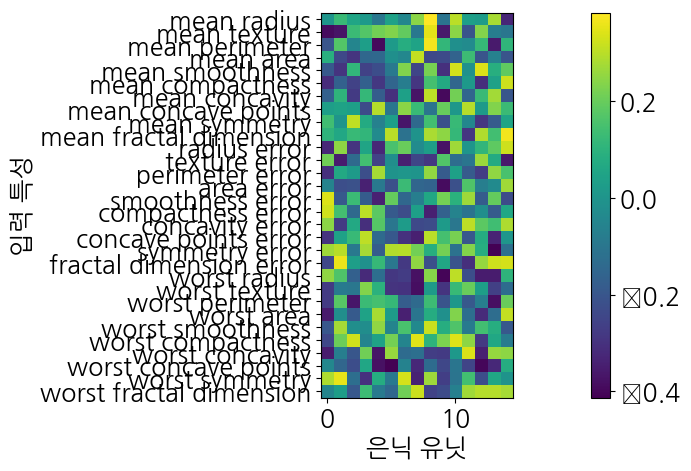

In [118]:
# (30, 15) # 각 변수에 대하여 15번 값의 특징을 추출
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')  # mlp.coefs_[0] = (30x15) / 원본값 사용(interpolation = True)
plt.yticks(range(30), cancer.feature_names)  # y축의 눈금을 0 ~ 29까지 설정하고 각 눈금마다 특성의 이름을 표시
plt.xlabel("은닉 유닛")
plt.ylabel("입력 특성")
plt.colorbar()

In [119]:
import pandas as pd
wine = pd.read_csv('/content/drive/MyDrive/wine_data.csv')
print(wine.head())

   1  14.23  1.71  2.43  15.6  127   2.8  3.06   .28  2.29  5.64  1.04  3.92  \
0  1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28  4.38  1.05  3.40   
1  1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81  5.68  1.03  3.17   
2  1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18  7.80  0.86  3.45   
3  1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82  4.32  1.04  2.93   
4  1  14.20  1.76  2.45  15.2  112  3.27  3.39  0.34  1.97  6.75  1.05  2.85   

   1065  
0  1050  
1  1185  
2  1480  
3   735  
4  1450  


In [120]:
wine = pd.read_csv('/content/drive/MyDrive/wine_data.csv', names = ["Cultivator", "Alchol", "Malic_Acid", "Ash",
                                             "Alcalinity_of_Ash", "Magnesium", "Total_phenols",
                                             "Falvanoids", "Nonflavanoid_phenols",
                                             "Proanthocyanins", "Color_intensity", "Hue",
                                             "OD280", "Proline"], encoding="utf-8")
print(wine.head())

   Cultivator  Alchol  Malic_Acid   Ash  Alcalinity_of_Ash  Magnesium  \
0           1   14.23        1.71  2.43               15.6        127   
1           1   13.20        1.78  2.14               11.2        100   
2           1   13.16        2.36  2.67               18.6        101   
3           1   14.37        1.95  2.50               16.8        113   
4           1   13.24        2.59  2.87               21.0        118   

   Total_phenols  Falvanoids  Nonflavanoid_phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color_intensity   Hue  OD280  Proline  
0             5.64  1.04   3.92     1065  
1             4.38  1.05   3.40     1050  
2    

In [121]:
# 회귀(identity), 이진분류(logistic), 다중분류(softmax)
print(wine.shape)
wine['Cultivator'].unique()  # 다중분류 / 누가 경작(재배)했는지

(178, 14)


array([1, 2, 3])

In [122]:
# 문제
# X, y 데이터로 분리하기 
from sklearn.model_selection import train_test_split
X = wine.drop('Cultivator', axis = 1)
y = wine['Cultivator']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [123]:
# 문제
# 독립변수에 정규화 작업 진행
# z-점수 scaler = (data - mean) / sd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(X_train)  # 평균, 표준편차  # 변수가 30개 (각 특징에 대해 자동으로 작업)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [124]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes = (30, 30, 30))  # 은닉층의 크기가 (30, 30, 30) => 3개의 은닉층, 각 은닉층은 30개의 뉴런
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(30, 30, 30))

In [125]:
# 문제
# 테스트 데이터에 대해 예측하고 accuracy_score 출력
from sklearn.metrics import accuracy_score
predictions = mlp.predict(X_test)  # X_test에 대해 예측한 결과 
accuracy_score(predictions, y_test)  # y_test : 실제값 / 예측값과 실제값 비교한 정확도 : 0.955

0.9333333333333333

In [126]:
# 모델 성능을 평가하기 위해 혼동 행렬(confusion matrix)과 분류 보고서(classification report) 출력

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))  # 실제값인 y_test와 모델 예측값인 predictions 비교하여 혼동행렬 생성
print(classification_report(y_test, predictions))  # y_test와 prediction 비교하여 분류 보고서 생성
# 분류 보고서 : 정확도(accuracy), 정밀도(precision), 재현율(recall), F1 스코어(F1-score) 등의 성능 지표를 제공

[[17  0  0]
 [ 2 13  0]
 [ 0  1 12]]
              precision    recall  f1-score   support

           1       0.89      1.00      0.94        17
           2       0.93      0.87      0.90        15
           3       1.00      0.92      0.96        13

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



In [127]:
mlp.out_activation_  # softmax : 전체 출력값 중 확률값을 1로 만들어주는 함수

'softmax'

In [128]:
# 문제
# 파라미터(parameter) 튜닝을 실시
# hidden_layer_sizes  # (30, 30, 30) (30, 20, 10)
# alpha  # [0.0001, 0.001, 0.01, 0.1, 1]

from sklearn.model_selection import GridSearchCV
model = MLPClassifier(hidden_layer_sizes = (30, 30, 30), max_iter = 1000)
model_cv = GridSearchCV(model, cv = 5,
        param_grid = {
                  'hidden_layer_sizes' : [(30, 30, 30), (30, 20, 10)],
                  'alpha' : [0.0001, 0.001, 0.01, 0.1, 1]})
model_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=MLPClassifier(hidden_layer_sizes=(30, 30, 30),
                                     max_iter=1000),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                         'hidden_layer_sizes': [(30, 30, 30), (30, 20, 10)]})

In [129]:
model_cv.best_estimator_

MLPClassifier(alpha=0.01, hidden_layer_sizes=(30, 30, 30), max_iter=1000)

In [130]:
model_cv.best_score_
model_cv.best_params_

{'alpha': 0.01, 'hidden_layer_sizes': (30, 30, 30)}

In [131]:
predictions = model_cv.predict(X_test)
accuracy_score(predictions, y_test)

0.9555555555555556

In [132]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
data1 = pd.read_csv('/content/drive/MyDrive/breast-cancer-wisconsin.csv', encoding='utf-8')
data1.head()
data1.columns  # Class : target 변수 (종속변수)

Index(['code', 'Clump_Thickness', 'Cell_Size', 'Cell_Shape',
       'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei',
       'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [188]:
print(type(data1))

<class 'pandas.core.frame.DataFrame'>


In [133]:
X = data1[data1.columns[1:10]]
y = data1[["Class"]]

In [185]:
y.dtypes

house_value    int64
dtype: object

In [134]:
X.dtypes
# 회귀, 분류 (model : XGBoost, SVM) / scaler 

Clump_Thickness                int64
Cell_Size                      int64
Cell_Shape                     int64
Marginal_Adhesion              int64
Single_Epithelial_Cell_Size    int64
Bare_Nuclei                    int64
Bland_Chromatin                int64
Normal_Nucleoli                int64
Mitoses                        int64
dtype: object

In [135]:
# 데이터 훈련셋과 테스트셋으로 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,  # 클래스 비율 유지하며 X, y 나누기
                                                    random_state = 42)

In [136]:
# 최소 최대 스케일러를 이용하여 정규화 (데이터 범위를 최소값과 최대값 사이로 조정) (0 ~ 1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)  # 스케일링을 위한 변환기를 학습 (학습 데이터에 있는 최소값, 최대값 기반으로 스케일링)
X_scaled_train = scaler.transform(X_train)  # 학습 데이터 스케일링
X_scaled_test = scaler.transform(X_test)  # 테스트 데이터 스케일링

In [137]:
# MLPClassifier 사용하여 모델학습 후 훈련셋에 대한 예측을 수행하여 정확도를 계산 
from sklearn.neural_network import MLPClassifier
model = MLPClassifier()
model.fit(X_scaled_train, y_train)  # 입력 데이터 X_scaled_train과 레이블 y_train을 사용하여 모델학습
pred_train = model.predict(X_scaled_train)  # 훈련셋에 대한 예측값 계산
model.score(X_scaled_train, y_train)  # 훈련셋에 대한 예측 정확도를 계산 (정확도는 예측값과 실제값을 비교하여 일치하는 비율로 계산)

0.97265625

In [138]:
from sklearn.metrics import confusion_matrix
confusion_train = confusion_matrix(y_train, pred_train)
print("훈련데이터 오차행렬: \n", confusion_train)

훈련데이터 오차행렬: 
 [[327   6]
 [  8 171]]


In [139]:
# 하이퍼 파라미터를 Grid Search하여 튜닝
param_grid = {'hidden_layer_sizes' : [10, 30, 50, 100], 'solver': ['sgd', 'adam'],
                'activation': ['tanh', 'relu']}  # 'hidden_layer_sizes', 'solver', 'activation' 파라미터에 대해 탐색할 후보값 지정
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(MLPClassifier(), param_grid, cv = 5)  # 5폴드 교차검증 (테스트셋을 다섯번 사용하여 성능 평가)
grid_search.fit(X_scaled_train, y_train)  # 그리드 서치 수행하여 최적의 하이퍼파라미터 탐색

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['tanh', 'relu'],
                         'hidden_layer_sizes': [10, 30, 50, 100],
                         'solver': ['sgd', 'adam']})

In [140]:
print('Testset Score: {:.4f}'.format(grid_search.score(
    X_scaled_test, y_test)))

Testset Score: 0.9591


In [141]:
# 회귀문제 MLPegressor
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [142]:
data2 = pd.read_csv('/content/drive/MyDrive/house_price.csv', encoding='utf-8')
X = data2[data2.columns[1:5]]
y = data2[['house_value']]  # 결측치, 정규화 => 범주화

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
scaler = MinMaxScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [144]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor()
model.fit(X_scaled_train, y_train)
pred_train = model.predict(X_scaled_train)
model.score(X_scaled_train, y_train)

-2.7696407669626355

In [145]:
pred_test = model.predict(X_scaled_test)
model.score(X_scaled_test, y_test)

-2.727378325679595

In [146]:
# RMSE : 회귀 문제에서 예측 모델의 성능을 평가하는 지표
# 예측값과 실제값의 차이를 제곱한 후 평균을 구한 뒤, 다시 제곱근을 취하기
# 예측 모델이 실제값과 얼마나 차이가 나는지를 나타내는 값, 0에 가까울수록 예측이 실제값에 더 가깝다 (더 정확하다)
import numpy as np
from sklearn.metrics import mean_squared_error
MSE_train = mean_squared_error(y_train, pred_train)
MSE_test = mean_squared_error(y_test, pred_test)
print("훈련 데이터 RMSE: ", np.sqrt(MSE_train))
print("테스트 데이터 RMSE: ", np.sqrt(MSE_test))

훈련 데이터 RMSE:  185310.92619191704
테스트 데이터 RMSE:  184571.31722754595


In [147]:
# 모델 튜닝을 통해 rmse 증명
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes = (64,64,64), activation='relu',
                     random_state=42, max_iter=2000)
model.fit(X_scaled_train, y_train)
pred_train = model.predict(X_scaled_train)
model.score(X_scaled_train, y_train)

0.5643797100611765

In [148]:
pred_test = model.predict(X_scaled_test)
model.score(X_scaled_test, y_test)

0.5823255888282528

In [149]:
# 문제 < 201_boston.csv >
# 데이터 로딩
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/201_boston.csv', encoding='utf-8')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [150]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [151]:
# CRIM 필드를 기준으로 내림차순 정렬
data = data.sort_values(by='CRIM', ascending = False)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
380,88.97620,0.0,18.10,0.0,0.671,6.968,91.9,1.4165,24.0,666.0,20.2,396.90,17.21
418,73.53410,0.0,18.10,0.0,0.679,5.957,100.0,1.8026,24.0,666.0,20.2,16.45,20.62
405,67.92080,0.0,18.10,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98
410,51.13580,0.0,18.10,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11
414,45.74610,0.0,18.10,0.0,0.693,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,0.01311,90.0,1.22,0.0,0.403,7.249,21.9,8.6966,5.0,226.0,17.9,395.93,4.81
341,0.01301,35.0,1.52,0.0,0.442,7.241,49.3,7.0379,1.0,284.0,15.5,394.74,5.49
285,0.01096,55.0,2.25,0.0,0.389,6.453,31.9,7.3073,1.0,300.0,15.3,394.72,8.23
284,0.00906,90.0,2.97,0.0,0.400,7.088,20.8,7.3073,1.0,285.0,15.3,394.72,7.85


In [152]:
# 정렬된 데이터의 9번째 행을 출력
crim10_value = data.iloc[9, 0]
print(crim10_value)

25.9406


In [153]:
# 9번째 행의 데이터로 9번까지의 데이터 모두 변경
data.iloc[:9, 0] = crim10_value
print(data.head(12))

        CRIM   ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
380  25.9406  0.0   18.1   0.0  0.671  6.968   91.9  1.4165  24.0  666.0   
418  25.9406  0.0   18.1   0.0  0.679  5.957  100.0  1.8026  24.0  666.0   
405  25.9406  0.0   18.1   0.0  0.693  5.683  100.0  1.4254  24.0  666.0   
410  25.9406  0.0   18.1   0.0  0.597  5.757  100.0  1.4130  24.0  666.0   
414  25.9406  0.0   18.1   0.0  0.693  4.519  100.0  1.6582  24.0  666.0   
404  25.9406  0.0   18.1   0.0  0.693  5.531   85.4  1.6074  24.0  666.0   
398  25.9406  0.0   18.1   0.0  0.693  5.453  100.0  1.4896  24.0  666.0   
427  25.9406  0.0   18.1   0.0  0.679  6.202   78.7  1.8629  24.0  666.0   
413  25.9406  0.0   18.1   0.0  0.597  5.155  100.0  1.5894  24.0  666.0   
417  25.9406  0.0   18.1   0.0  0.679  5.304   89.1  1.6475  24.0  666.0   
400  25.0461  0.0   18.1   0.0  0.693  5.987  100.0  1.5888  24.0  666.0   
403  24.8017  0.0   18.1   0.0  0.693  5.349   96.0  1.7028  24.0  666.0   

     PTRATI

In [154]:
# AGE가 80 이상인 건물의 RIM 평균 구하기
data_80 = data[data['AGE'] >= 80]
result = data_80['CRIM'].mean()
print(result)

5.759386625


In [159]:
# 문제 < 202_housing.csv >
# 데이터 로딩 
housing = pd.read_csv('/content/drive/MyDrive/202_housing.csv', encoding='utf-8')
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [160]:
housing.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [163]:
# 데이터의 'total_bedrooms' 필드만 80% 별도 취합
int(housing.shape[0]*0.8)
int(len(housing)*0.8)
bedrooms = housing['total_bedrooms'][:int(len(housing) * 0.8)]
print(bedrooms)

0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
16507     599.0
16508     331.0
16509     411.0
16510     941.0
16511     417.0
Name: total_bedrooms, Length: 16512, dtype: float64


In [164]:
# 표준편차를 계산
std1 = bedrooms.std()
print(std1)

435.90057705252616


In [165]:
# 중위수를 계산
med = bedrooms.median()
print(med)

436.0


In [166]:
# 결측값을 중위수로 채우기
bedrooms_fill = bedrooms.fillna(med)

In [167]:
# 채운 후, 표준편차 구하기
std2 = bedrooms_fill.std()
print(std2)

433.9254297608805


In [168]:
# 처음 표준편차를 구한 값과 나중에 결측치를 채운 후의 표준편차 값의 차를 구하기
result = abs(std1 - std2)
print(result)

1.9751472916456692


In [ ]:
# 데이터를 로딩
housing

In [171]:
# housing['population'] 에 대하여 평균과 표준편차를 구하기
population = housing['population']
mean = population.mean()
std = population.std()
print("평균: ", mean)
print("표준편차: ", std)

평균:  1425.4767441860465
표준편차:  1132.462121765341


In [172]:
# 이상치의 임계치를 계산  # 보통 IQR * 1.5  # (평균의 표준편차 1.5배수로 고려하라고 문제가 나오기도 함.)
lower = mean - (std * 1.5)
upper = mean + (std * 1.5)

print("정상범위 최소값: ", lower)
print("정상범위 최대값: ", upper)

정상범위 최소값:  -273.2164384619648
정상범위 최대값:  3124.169926834058


In [173]:
# 이상값 데이터를 추출
population_outlier = population[(population < lower) | (population > upper)]
print(population_outlier)

95       3469.0
185      4367.0
283      4985.0
460      3337.0
485      3276.0
          ...  
20543    3717.0
20544    6330.0
20563    6837.0
20604    3265.0
20629    6912.0
Name: population, Length: 1207, dtype: float64


In [174]:
# 이상값 데이터의 합계 구하기
result = population_outlier.sum()
print(result)

5607295.0


In [ ]:
# 신경망의 softmax
# out Activation function
# 회귀(identity), 이진분류(logistic), 다중분류(softmax)

In [176]:
import numpy as np
scores = [3.0, 1.0, 0.2]  # 3개로 분류
def softmax(x):
  return np.exp(x) / np.sum(np.exp(x), axis = 0)  # 모든 클래스의 지수 함수의 합을 각 클래스의 확률로 정규화

In [177]:
print(softmax(scores))  # 각 클래스에 대한 확률

[0.8360188  0.11314284 0.05083836]


In [178]:
sum(softmax(scores))

0.9999999999999999

-1.0
-1.0


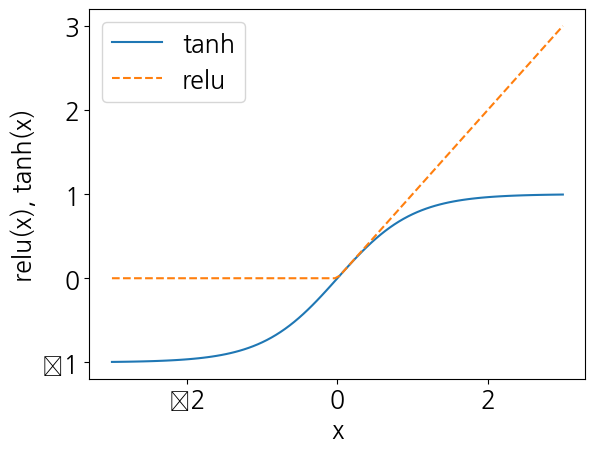

In [179]:
# np.maximum(line, 0) : relu 함수 (입력값이 음수면 0, 양수면 그 값을 그대로 출력)
# Activation function : 비선형 매핑 용도로 사용됨
# 내적하는 연산 node마다 activation function을 작동하게 함 -> 비선형으로 매핑
line = np.linspace(-3, 3, 100)  # -3부터 3까지의 구간을 100등분
plt.plot(line, np.tanh(line), label='tanh')  # tanh : [-1 ~ 1] 사이의 값
plt.plot(line, np.maximum(line, 0), linestyle = '--', label = 'relu')  # relu 함수 그래프를 점선 스타일('--')로 지정
plt.legend(loc = 'best')  # 최적의 위치(best)에 범례를 표시 
plt.xlabel('x')
plt.ylabel('relu(x), tanh(x)')
print(np.tanh(-100))  # -1 ~ 1 : sigmoid 확률값으로 매핑 (0 ~ 1값)
print(np.tanh(-1000000))

In [181]:
# sigmoid 함수 : (0 ~ 1 사이의 값) (비선형 함수)
def sigmoid(inputs):
  sigmoid_scores = [1 / float(1 + np.exp(-x)) for x in inputs]  # sigmoid 함수의 수식 (주어진 입력값을 0~1 사이 값으로 변환)
  return sigmoid_scores
sigmoid_inputs = [-200, 3, 5, 6, 10, 100]
sigmoid(sigmoid_inputs)

[1.3838965267367376e-87,
 0.9525741268224334,
 0.9933071490757153,
 0.9975273768433653,
 0.9999546021312976,
 1.0]